# TASK 4

## Hand Gesture Recognition

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image


In [30]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for sub_folder in os.listdir(folder):
        sub_folder_path = os.path.join(folder, sub_folder)
        if os.path.isdir(sub_folder_path):
            for filename in os.listdir(sub_folder_path):
                img = Image.open(os.path.join(sub_folder_path, filename)).convert('L')  
                img = img.resize((64, 64))  
                img = np.array(img) / 255.0 
                images.append(img)
                labels.append(sub_folder) 

    return np.array(images), np.array(labels)

In [31]:
data_folder = 'C:\\Users\\Shruti\\leapGestRecog\\00'  
images, labels = load_images_from_folder(data_folder)

In [32]:
images = np.expand_dims(images, axis=-1) 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [34]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(lb.classes_), activation='softmax')
])


C:\Users\Shruti\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\Shruti\anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.2578 - loss: 2.0227 - val_accuracy: 0.9370 - val_loss: 0.3819
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7977 - loss: 0.6753 - val_accuracy: 0.9973 - val_loss: 0.0599
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9025 - loss: 0.3050 - val_accuracy: 0.9973 - val_loss: 0.0221
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9683 - loss: 0.1338 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9823 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9874 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9923 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9919 - loss: 0.0325 - val_accuracy: 1.0000 - val

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9923 - loss: 0.0155
Test accuracy: 0.9972602725028992


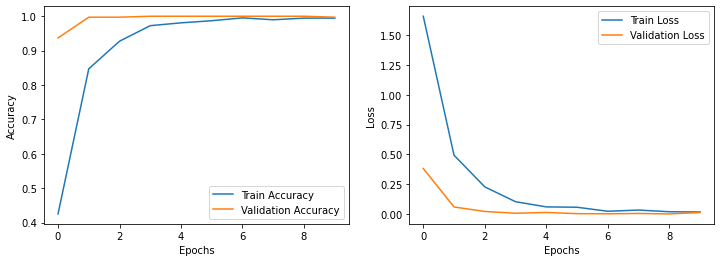

In [38]:
 plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


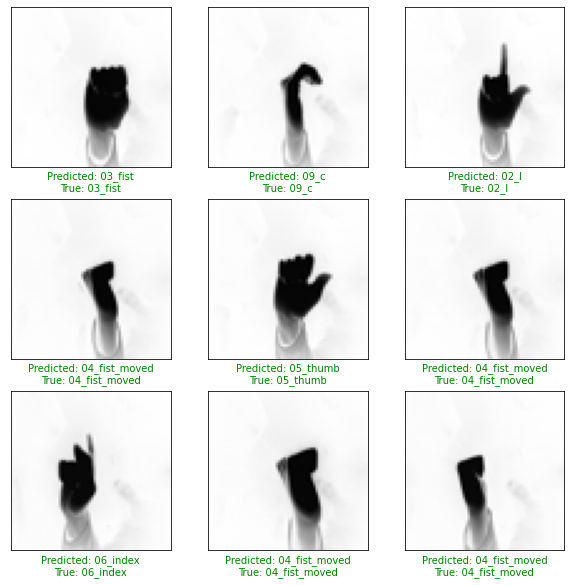

In [40]:
def display_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(64, 64), cmap=plt.cm.binary)
        predicted_label = lb.classes_[np.argmax(predictions[i])]
        true_label = lb.classes_[np.argmax(labels[i])]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
    plt.show()


predictions = model.predict(X_test)
display_predictions(X_test, y_test, predictions)